<a href="https://colab.research.google.com/github/luanamirandaa/projeto_final_pretalab/blob/main/analise_seguranca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2. Segurança Pública: Comparativo SP x RJ

Link: https://basedosdados.org/dataset/90324ba8-9c39-4191-a8a4-302f93732464?table=edf80eb4-0c97-4d07-bf4a-711144510b81

Link: https://basedosdados.org/dataset/dbd717cb-7da8-4efd-9162-951a71694541?table=a2e9f998-e2c2-49b7-858a-ae1daef46dc0

Contexto: Dados da Secretaria de Segurança Pública de São Paulo e do Instituto de Segurança Pública do Rio de Janeiro.

#Estrutura da atividade de análise de dados sobre segurança pública em SP e RJ em python com os datasets escolhidos:

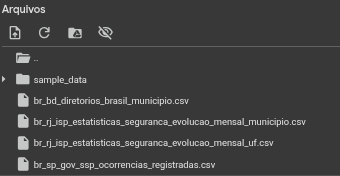

In [ ]:
#importar as bibliotecas necessárias para a análise
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de visualização
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams['font.size'] = 12

# --- 0. Carregamento dos Dados ---
try:
    df_sp_ocorrencias = pd.read_csv('br_sp_gov_ssp_ocorrencias_registradas.csv')
    df_rj_evolucao_uf = pd.read_csv('br_rj_isp_estatisticas_seguranca_evolucao_mensal_uf.csv')
    df_rj_evolucao_municipio = pd.read_csv('br_rj_isp_estatisticas_seguranca_evolucao_mensal_municipio.csv')
    print("Todos os arquivos CSV foram carregados com sucesso!")
except FileNotFoundError as e:
    print(f"Erro ao carregar o arquivo: {e}. Certifique-se de que os arquivos CSV estão na mesma pasta do script.")
    exit() # Interrompe o script se os arquivos não forem encontrados

# --- 1. Pré-processamento e Limpeza dos Dados ---

Todos os arquivos CSV foram carregados com sucesso!


1- Tratamento de todas as tabelas que iremos utilizar

In [ ]:
# 1.1. Tratamento para SP: df_sp_ocorrencias
print("\n--- Processando dados de SP (ocorrencias_registradas) ---")
# Criar coluna de data
df_sp_ocorrencias['data'] = pd.to_datetime(df_sp_ocorrencias['ano'].astype(str) + '-' + df_sp_ocorrencias['mes'].astype(str) + '-01')
df_sp_ocorrencias['estado'] = 'SP'

# Filtrar o período comum (2002-2021)
df_sp_ocorrencias = df_sp_ocorrencias[(df_sp_ocorrencias['data'].dt.year >= 2002) & (df_sp_ocorrencias['data'].dt.year <= 2021)].copy()

# Preencher NAs em colunas numéricas com 0 (assumindo que NA significa 0 ocorrências para crimes)
numerical_cols_sp = df_sp_ocorrencias.select_dtypes(include=['int64', 'float64']).columns
df_sp_ocorrencias[numerical_cols_sp] = df_sp_ocorrencias[numerical_cols_sp].fillna(0)

print(f"Dados de SP filtrados para o período 2002-2021. Linhas restantes: {len(df_sp_ocorrencias)}")
print(df_sp_ocorrencias[['data', 'ano', 'mes', 'homicidio_doloso', 'homicidio_culposo_outros', 'roubo_outros', 'furto_outros']].head())

In [ ]:
# 1.2. Tratamento para RJ (UF): df_rj_evolucao_uf
print("\n--- Processando dados de RJ (evolucao_mensal_uf) ---")
# Criar coluna de data
df_rj_evolucao_uf['data'] = pd.to_datetime(df_rj_evolucao_uf['ano'].astype(str) + '-' + df_rj_evolucao_uf['mes'].astype(str) + '-01')
df_rj_evolucao_uf['estado'] = 'RJ'

# Filtrar o período comum (2002-2021)
df_rj_evolucao_uf = df_rj_evolucao_uf[(df_rj_evolucao_uf['data'].dt.year >= 2002) & (df_rj_evolucao_uf['data'].dt.year <= 2021)].copy()

# Preencher NAs em colunas numéricas com 0
numerical_cols_rj_uf = df_rj_evolucao_uf.select_dtypes(include=['int64', 'float64']).columns
df_rj_evolucao_uf[numerical_cols_rj_uf] = df_rj_evolucao_uf[numerical_cols_rj_uf].fillna(0)

print(f"Dados do RJ (UF) filtrados para o período 2002-2021. Linhas restantes: {len(df_rj_evolucao_uf)}")
# Verificando algumas colunas importantes do RJ
print("\nColunas relevantes para crimes na base do RJ (UF):")
print([col for col in df_rj_evolucao_uf.columns if any(keyword in col for keyword in ['hom', 'roubo', 'furto', 'letal'])])
print(df_rj_evolucao_uf[['data', 'ano', 'mes', 'quantidade_homicidio_doloso', 'quantidade_homicidio_culposo', 'quantidade_homicidio_intervencao_policial']].head()) # Ajuste as colunas conforme sua verificação

# 1.3. Tratamento para RJ (Município): df_rj_evolucao_municipio
print("\n--- Processando dados de RJ (evolucao_mensal_municipio) ---")
df_rj_evolucao_municipio['data'] = pd.to_datetime(df_rj_evolucao_municipio['ano'].astype(str) + '-' + df_rj_evolucao_municipio['mes'].astype(str) + '-01')
df_rj_evolucao_municipio['estado'] = 'RJ'
df_rj_evolucao_municipio = df_rj_evolucao_municipio[(df_rj_evolucao_municipio['data'].dt.year >= 2002) & (df_rj_evolucao_municipio['data'].dt.year <= 2021)].copy()

numerical_cols_rj_municipio = df_rj_evolucao_municipio.select_dtypes(include=['int64', 'float64']).columns
df_rj_evolucao_municipio[numerical_cols_rj_municipio] = df_rj_evolucao_municipio[numerical_cols_rj_municipio].fillna(0)

print(f"Dados do RJ (Município) filtrados para o período 2002-2021. Linhas restantes: {len(df_rj_evolucao_municipio)}")
print(df_rj_evolucao_municipio[['data', 'quantidade_homicidio_doloso', 'quantidade_homicidio_culposo']].head())

#Pergunta 1: Qual estado tem as maiores taxas de homicídio por região/metrópole?

#Desafio:
Um dos desafios que enfrentamos para responder essa pergunta é que os datasets fornecidos não contêm dados de população por município/região, o que é essencial para calcular taxas. Sem população, só podemos comparar números absolutos de ocorrências. Além disso, a definição de "região/metrópole" pode variar entre SP e RJ e entre os datasets.

#Solução feita pelo grupo:
Para começar, vamos comparar o número absoluto de homicídios dolosos e culposos entre (SP vs RJ) a nivel estadual, após isso escolhemos o homicídio doloso para analisar a nível de municípios do Estado de RJ e o de SP a nivel região.

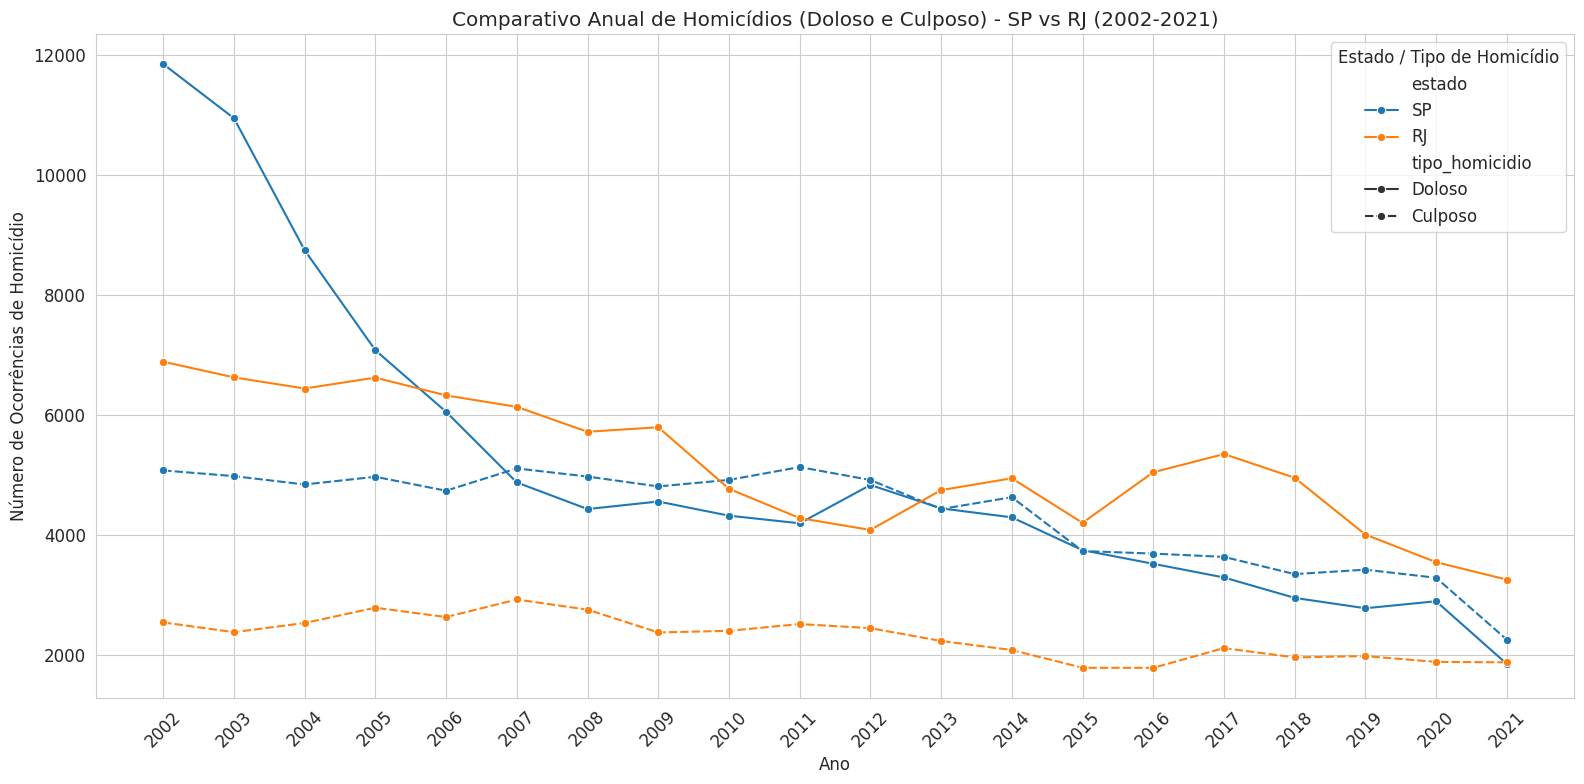


--- Resumo de Homicídios (Médias Anuais) ---
  estado tipo_homicidio  homicidio_doloso
0     RJ        Culposo           2297.45
1     RJ         Doloso           5184.30
2     SP        Culposo           4341.95
3     SP         Doloso           5080.20


In [ ]:
# Visualização Homicídios tanto Culposo e Doloso a nivel estadual

# Filtrar os dados para o período 2002-2021
homicidios_comparativo_estadual_filtrado = homicidios_comparativo_estadual[
    (homicidios_comparativo_estadual['ano'] >= 2002) &
    (homicidios_comparativo_estadual['ano'] <= 2021)
].copy()


plt.figure(figsize=(16, 8))
sns.lineplot(data=homicidios_comparativo_estadual_filtrado, x='ano', y='homicidio_doloso', hue='estado', style='tipo_homicidio', marker='o')
plt.title('Comparativo Anual de Homicídios (Doloso e Culposo) - SP vs RJ (2002-2021)')
plt.xlabel('Ano')
plt.ylabel('Número de Ocorrências de Homicídio')
plt.xticks(homicidios_comparativo_estadual_filtrado['ano'].unique(), rotation=45)
plt.grid(True)
plt.legend(title='Estado / Tipo de Homicídio')
plt.tight_layout()
plt.savefig('homicidios_anuais_sp_rj.png')
plt.show()

print("\n--- Resumo de Homicídios (Médias Anuais) ---")
print(homicidios_comparativo_estadual_filtrado.groupby(['estado', 'tipo_homicidio'])['homicidio_doloso'].mean().reset_index())

Conforme abordado, a limitação de dados populacionais desagregados por região impede o cálculo de taxas de homicídio a nível regional. Desta forma, optamos por uma análise do número absoluto de ocorrências de homicídios dolosos e culposos a nível estadual, comparando São Paulo e Rio de Janeiro no período de 2002 a 2021. O gráfico acima ilustra claramente as tendências observadas. Em relação aos homicídios dolosos, ambos os estados apresentaram uma notável redução ao longo das duas décadas. No entanto, é visível que o Rio de Janeiro iniciou o período com um volume consideravelmente mais alto, mas demonstrou uma queda mais acentuada, aproximando-se dos patamares de São Paulo. Já para os homicídios culposos, cujo volume é substancialmente menor, os números permaneceram relativamente estáveis em ambos os estados, com o Rio de Janeiro frequentemente registrando volumes discretamente superiores. Essa visualização dos dados absolutos permite identificar as dinâmicas gerais de cada tipo de homicídio em nível estadual, servindo como base para futuras análises mais aprofundadas, que idealmente incluiriam dados populacionais para o cálculo de taxas.


--- Análise da Pergunta 1: Uma análise dos Homicídios Dolosos e Culposos ---

--- Média Anual de Homicídios Dolosos por Região SSP em SP (2002-2021) ---
                            regiao_ssp  homicidio_doloso
0                              Capital           1577.95
1  Grande São Paulo (exclui a Capital)           1311.10
2                             Campinas            365.10
3                  São José dos Campos            360.65
4                           Piracicaba            301.40


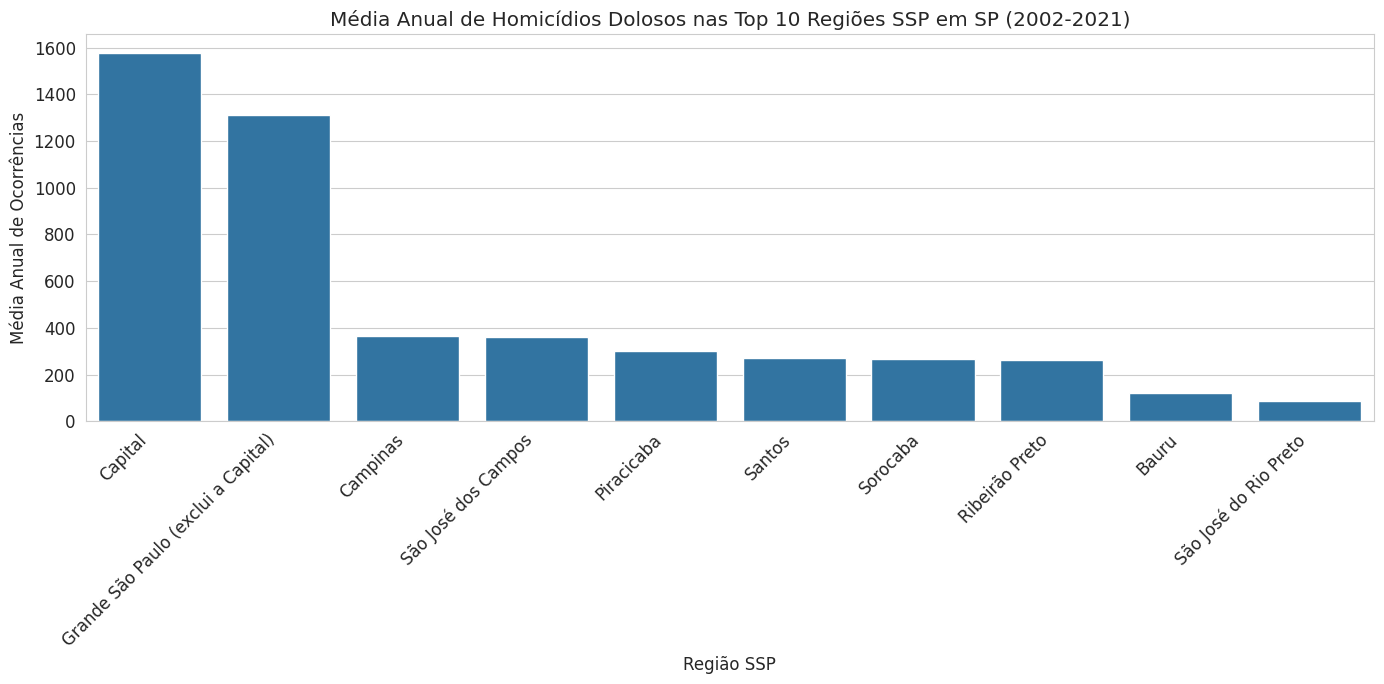

In [ ]:
print("\n--- Análise da Pergunta 1: Uma análise dos Homicídios Dolosos e Culposos ---")

# 2.1. Homicídios Dolosos (Estadual)
homicidios_dolosos_sp = df_sp_ocorrencias.groupby('ano')['homicidio_doloso'].sum().reset_index()
homicidios_dolosos_sp['tipo_homicidio'] = 'Doloso'
homicidios_dolosos_sp['estado'] = 'SP'

homicidios_dolosos_rj = df_rj_evolucao_uf.groupby('ano')['quantidade_homicidio_doloso'].sum().reset_index()
homicidios_dolosos_rj['tipo_homicidio'] = 'Doloso'
homicidios_dolosos_rj['estado'] = 'RJ'
homicidios_dolosos_rj = homicidios_dolosos_rj.rename(columns={'quantidade_homicidio_doloso': 'homicidio_doloso'})

# 2.2. Homicídios Culposos (Estadual)

# Para SP, 'homicidio_culposo_outros' e 'homicidio_culposo_por_acidente_de_transito'
df_sp_ocorrencias['homicidio_culposo_total'] = df_sp_ocorrencias['homicidio_culposo_outros'] + \
                                                df_sp_ocorrencias['homicidio_culposo_por_acidente_de_transito']
homicidios_culposos_sp = df_sp_ocorrencias.groupby('ano')['homicidio_culposo_total'].sum().reset_index()
homicidios_culposos_sp['tipo_homicidio'] = 'Culposo'
homicidios_culposos_sp['estado'] = 'SP'
homicidios_culposos_sp = homicidios_culposos_sp.rename(columns={'homicidio_culposo_total': 'homicidio_doloso'}) # Renomeia para concatenar

# Para RJ, 'homicidio_culposo'
homicidios_culposos_rj = df_rj_evolucao_uf.groupby('ano')['quantidade_homicidio_culposo'].sum().reset_index()
homicidios_culposos_rj['tipo_homicidio'] = 'Culposo'
homicidios_culposos_rj['estado'] = 'RJ'
homicidios_culposos_rj = homicidios_culposos_rj.rename(columns={'quantidade_homicidio_culposo': 'homicidio_doloso'}) # Renomeia para concatenar

# Combinar todos os dados de homicídio
homicidios_comparativo_estadual = pd.concat([
    homicidios_dolosos_sp,
    homicidios_dolosos_rj,
    homicidios_culposos_sp,
    homicidios_culposos_rj
])


# 2.3. Homicídios por Região/Metrópole (com foco em números absolutos para SP, e Municípios para RJ)

# Para SP: Homicídios Dolosos por Região SSP
homicidios_sp_por_regiao = df_sp_ocorrencias.groupby(['regiao_ssp', 'ano'])['homicidio_doloso'].sum().reset_index()
# Pegar a média anual por região para ter uma ideia das "maiores" em termos de volume
media_homicidios_sp_regiao = homicidios_sp_por_regiao.groupby('regiao_ssp')['homicidio_doloso'].mean().sort_values(ascending=False).reset_index()
print("\n--- Média Anual de Homicídios Dolosos por Região SSP em SP (2002-2021) ---")
print(media_homicidios_sp_regiao.head())

# Visualização Top N Regiões SP (Homicídios Dolosos)
plt.figure(figsize=(14, 7))
sns.barplot(x='regiao_ssp', y='homicidio_doloso', data=media_homicidios_sp_regiao.head(10)) # Top 10 regiões
plt.title('Média Anual de Homicídios Dolosos nas Top 10 Regiões SSP em SP (2002-2021)')
plt.xlabel('Região SSP')
plt.ylabel('Média Anual de Ocorrências')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('homicidios_top_regioes_sp.png')
plt.show()


Aprofundando a análise dos homicídios dolosos no estado de São Paulo, o gráfico acima ilustra a média anual de ocorrências nas dez Regiões SSP com os maiores volumes registrados entre 2002 e 2021. Fica evidente a concentração da violência letal nas áreas mais densamente povoadas: A Capital e na Grande São Paulo se destacam com as maiores médias anuais de homicídios dolosos. As demais regiões listadas, embora com volumes menores, representam outros polos importantes no estado, como Campinas e São José dos Campos, que também demandam atenção em termos de segurança pública.

Arquivo de mapeamento de municípios carregado com sucesso!


,id_municipio,id_municipio_6,id_municipio_tse,id_municipio_rf,id_municipio_bcb,nome,capital_uf,id_comarca,id_regiao_saude,nome_regiao_saude,...,nome_mesorregiao,id_regiao_metropolitana,nome_regiao_metropolitana,ddd,id_uf,sigla_uf,nome_uf,nome_regiao,amazonia_legal,centroide
0,1100809,110080,477,681,46961,Candeias do Jamari,0,1100205,11004,Madeira-Mamoré,...,Madeira-Guaporé,101,Região Metropolitana de Porto Velho,69,11,RO,Rondônia,Norte,1,POINT(-63.3254198532114 -8.88702392955617)
1,1100338,110033,434,47,44516,Nova Mamoré,0,1100106,11004,Madeira-Mamoré,...,Madeira-Guaporé,NaN,NaN,69,11,RO,Rondônia,Norte,1,POINT(-64.6295025002404 -10.3822863210755)
2,1100205,110020,35,3,30719,Porto Velho,1,1100205,11004,Madeira-Mamoré,...,Madeira-Guaporé,101,Região Metropolitana de Porto Velho,69,11,RO,Rondônia,Norte,1,POINT(-64.3041357999869 -9.15394033687075)
3,1101104,110110,493,683,46851,Itapuã do Oeste,0,1100205,11004,Madeira-Mamoré,...,Madeira-Guaporé,NaN,NaN,69,11,RO,Rondônia,Norte,1,POINT(-63.044960463046 -9.17019402601564)
4,1100940,110094,680,8,56652,Cujubim,0,1100023,11001,Vale do Jamari,...,Madeira-Guaporé,NaN,NaN,69,11,RO,Rondônia,Norte,1,POINT(-62.5652673033848 -9.1709863446154)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   id_municipio               5570 non-null   int64 
 1   id_municipio_6             5570 non-null   int64 
 2   id_municipio_tse           5570 non-null   int64 
 3   id_municipio_rf            5570 non-null   int64 
 4   id_municipio_bcb           5570 non-null   int64 
 5   nome                       5570 non-null   object
 6   capital_uf                 5570 non-null   int64 
 7   id_comarca                 5570 non-null   int64 
 8   id_regiao_saude            5570 non-null   int64 
 9   nome_regiao_saude          5570 non-null   object
 10  id_regiao_imediata         5570 non-null   int64 
 11  nome_regiao_imediata       5570 non-null   object
 12  id_regiao_intermediaria    5570 non-null   int64 
 13  nome_regiao_intermediaria  5570 non-null   object
 14  id_micro

None


--- Homicídios Dolosos no Município do Rio de Janeiro (Capital) por Ano ---
Empty DataFrame
Columns: [ano, quantidade_homicidio_doloso]
Index: []

--- Média Anual de Homicídios Dolosos por Município e Região no RJ (2002-2021) ---
    id_municipio              regiao  quantidade_homicidio_doloso
67       3304557             Capital                     1185.000
49       3303500  Baixada Fluminense                      348.125
24       3301702  Baixada Fluminense                      332.125
72       3304904     Grande NiterÃ³i                      303.375
8        3300456  Baixada Fluminense                      198.125


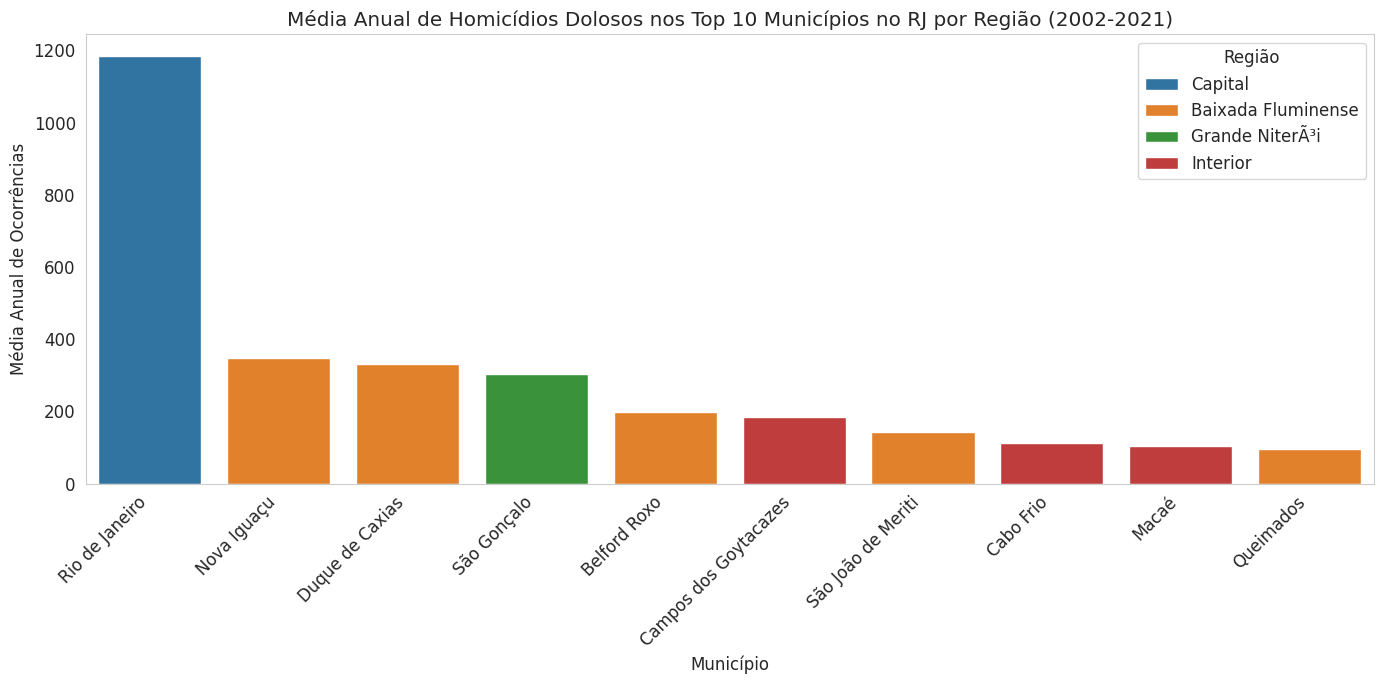

In [ ]:
# Para RJ: Homicídios Dolosos por Município

# Carregar o arquivo de mapeamento de municípios do estado do RJ
try:
    df_municipios = pd.read_csv('br_bd_diretorios_brasil_municipio.csv')
    print("Arquivo de mapeamento de municípios carregado com sucesso!")
    display(df_municipios.head())
    display(df_municipios.info())
except FileNotFoundError as e:
    print(f"Erro ao carregar o arquivo de municípios: {e}. Verifique o nome do arquivo e o caminho.")

# Para a Região Metropolitana do Rio de Janeiro, precisaria de uma lista de IDs de municípios.
# Por exemplo, id do município do Rio de Janeiro é '3304557'
homicidios_rj_municipio_capital = df_rj_evolucao_municipio[df_rj_evolucao_municipio['id_municipio'] == '3304557'].groupby('ano')['quantidade_homicidio_doloso'].sum().reset_index()
print("\n--- Homicídios Dolosos no Município do Rio de Janeiro (Capital) por Ano ---")
print(homicidios_rj_municipio_capital.head())

# Calcular a média anual por município e região
homicidios_rj_por_municipio_regiao = df_rj_evolucao_municipio.groupby(['id_municipio', 'regiao', 'ano'])['quantidade_homicidio_doloso'].sum().reset_index()

# Calcular a média anual por município e região e ordenar
media_homicidios_rj_municipio_regiao = homicidios_rj_por_municipio_regiao.groupby(['id_municipio', 'regiao'])['quantidade_homicidio_doloso'].mean().reset_index().sort_values(by='quantidade_homicidio_doloso', ascending=False)


print("\n--- Média Anual de Homicídios Dolosos por Município e Região no RJ (2002-2021) ---")
print(media_homicidios_rj_municipio_regiao.head())

# Criar mapeamento de id_municipio para nome do município
municipio_map = df_municipios.set_index('id_municipio')['nome'].to_dict()

# Adicionar coluna de nome do município ao dataframe de média de homicídios
media_homicidios_rj_municipio_regiao['nome_municipio'] = media_homicidios_rj_municipio_regiao['id_municipio'].map(municipio_map)


# Visualização Top N Municípios RJ (Homicídios Dolosos)
plt.figure(figsize=(14, 7))
# Usar 'nome_municipio' no eixo x e 'hue' para diferenciar as regiões por cor
sns.barplot(x='nome_municipio', y='quantidade_homicidio_doloso', hue='regiao', data=media_homicidios_rj_municipio_regiao.head(10), dodge=False) # Top 10 municípios
plt.title('Média Anual de Homicídios Dolosos nos Top 10 Municípios no RJ por Região (2002-2021)')
plt.xlabel('Município')
plt.ylabel('Média Anual de Ocorrências')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y') # Adicionar grid apenas no eixo Y
plt.legend(title='Região') # Adicionar legenda para as regiões
plt.tight_layout()
plt.savefig('homicidios_top_municipios_rj_regiao_nomes.png') # Salvar com novo nome
plt.show()

O gráfico acima apresenta a média anual de ocorrências nas dez cidades mais afetadas entre 2002 e 2021, categorizadas por suas regiões. Fica explícita a hegemonia do município do Rio de Janeiro em termos de volume médio de homicídios dolosos, demonstrando o desafio central da capital. Contudo, é igualmente crítico observar a forte presença de cidades da Baixada Fluminense e da Grande Niteroi, como Duque de Caxias, Nova Iguaçu, São Gonçalo e Belford Roxo, que em conjunto representam um foco significativo de violência letal. Embora municípios de outras regiões, como Campos dos Goytacazes (Interior), também estejam presentes, seus volumes são comparativamente menores.

#Pergunta 2: Como os crimes contra o patrimônio (roubos, furtos) variam sazonalmente em SP e RJ?

Esta é mais direta. Vamos somar os tipos de roubos e furtos e analisar a média mensal ao longo do período comum (2002-2021).

In [ ]:
# Selecionar colunas relevantes para SP
sp_roubo_cols = ['total_de_roubo_outros', 'roubo_outros', 'roubo_de_veiculo', 'roubo_a_banco', 'roubo_de_carga']
sp_furto_cols = ['furto_outros', 'furto_de_veiculo']
sp_base_cols = ['ano', 'mes', 'data', 'estado'] # Incluindo data e estado que já foram criados

df_sp_patrimonio = df_sp_ocorrencias[sp_base_cols + sp_roubo_cols + sp_furto_cols].copy()

# Criar colunas totalizadoras em SP
df_sp_patrimonio['total_roubos'] = df_sp_patrimonio[sp_roubo_cols].sum(axis=1)
df_sp_patrimonio['total_furtos'] = df_sp_patrimonio[sp_furto_cols].sum(axis=1)

# Selecionar colunas relevantes para RJ
rj_roubo_cols = ['quantidade_total_roubos']
rj_furto_cols = ['quantidade_total_furtos']
rj_base_cols = ['ano', 'mes', 'data', 'estado'] # Incluindo data e estado que já foram criados

df_rj_patrimonio = df_rj_evolucao_uf[rj_base_cols + rj_roubo_cols + rj_furto_cols].copy()

# Renomear colunas totalizadoras do RJ para corresponder a SP
df_rj_patrimonio.rename(columns={'quantidade_total_roubos': 'total_roubos', 'quantidade_total_furtos': 'total_furtos'}, inplace=True)


# Selecionar as colunas finais para concatenação (agora com nomes consistentes)
final_cols = ['data', 'estado', 'total_roubos', 'total_furtos']

df_sp_patrimonio_final = df_sp_patrimonio[final_cols]
df_rj_patrimonio_final = df_rj_patrimonio[final_cols]

# Concatenar os dataframes
df_patrimonio = pd.concat([df_sp_patrimonio_final, df_rj_patrimonio_final], ignore_index=True)

# Extrair o mês (já existe a coluna 'data', apenas garantimos)
df_patrimonio['mes'] = df_patrimonio['data'].dt.month

display(df_patrimonio.head())
display(df_patrimonio.info())

# 2. Calcular totais mensais
df_sazonalidade = df_patrimonio.groupby(['estado', 'mes'])[['total_roubos', 'total_furtos']].sum().reset_index()

display(df_sazonalidade.head())


,data,estado,total_roubos,total_furtos,mes
0,2002-01-01,SP,0.0,21.0,1
1,2002-02-01,SP,0.0,32.0,2
2,2002-03-01,SP,0.0,36.0,3
3,2002-04-01,SP,1.0,45.0,4
4,2002-05-01,SP,1.0,35.0,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154116 entries, 0 to 154115
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   data          154116 non-null  datetime64[ns]
 1   estado        154116 non-null  object        
 2   total_roubos  154116 non-null  float64       
 3   total_furtos  154116 non-null  float64       
 4   mes           154116 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), object(1)
memory usage: 5.3+ MB


None

,estado,mes,total_roubos,total_furtos
0,RJ,1,243993.0,266505.0
1,RJ,2,232875.0,263456.0
2,RJ,3,256231.0,266231.0
3,RJ,4,246606.0,239692.0
4,RJ,5,250837.0,250895.0


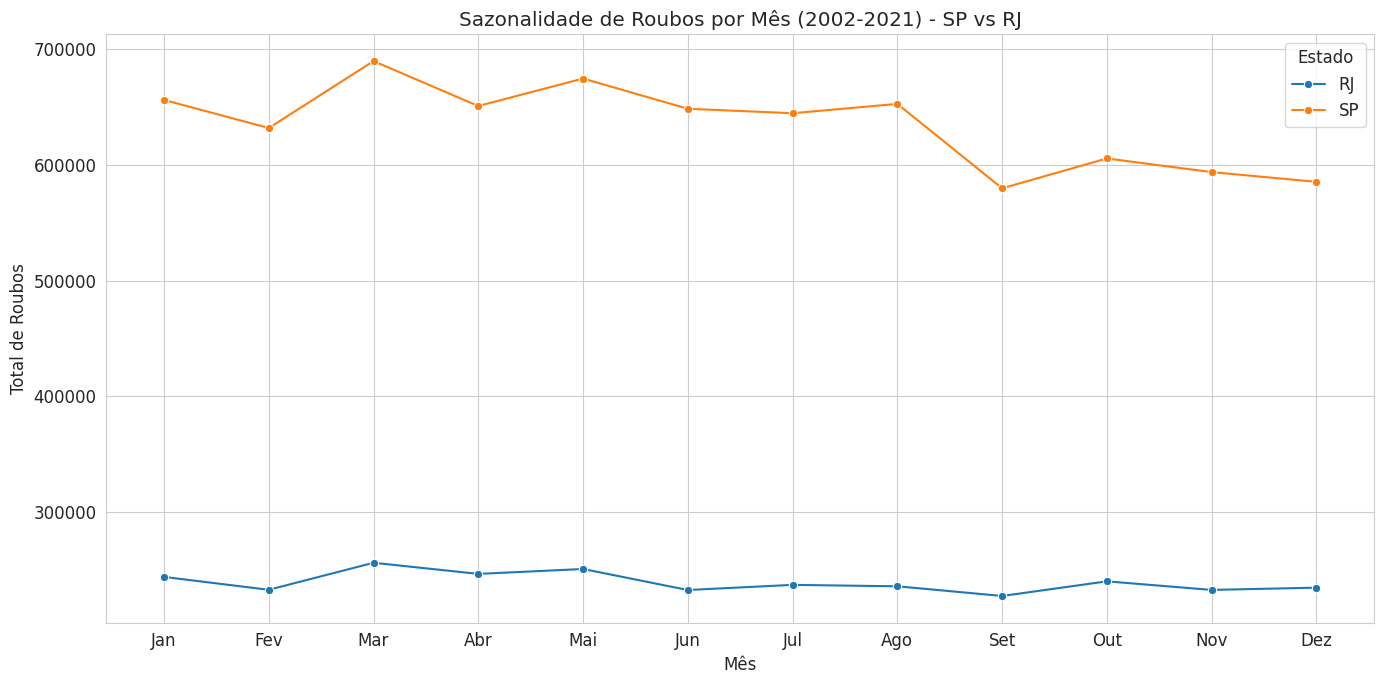

In [ ]:
# 3. Visualizar a sazonalidade de roubos
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_sazonalidade, x='mes', y='total_roubos', hue='estado', marker='o')
plt.title('Sazonalidade de Roubos por Mês (2002-2021) - SP vs RJ')
plt.xlabel('Mês')
plt.ylabel('Total de Roubos')
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.grid(True)
plt.legend(title='Estado')
plt.tight_layout()
plt.savefig('sazonalidade_roubos_sp_rj.png') # Salvar o gráfico
plt.show()

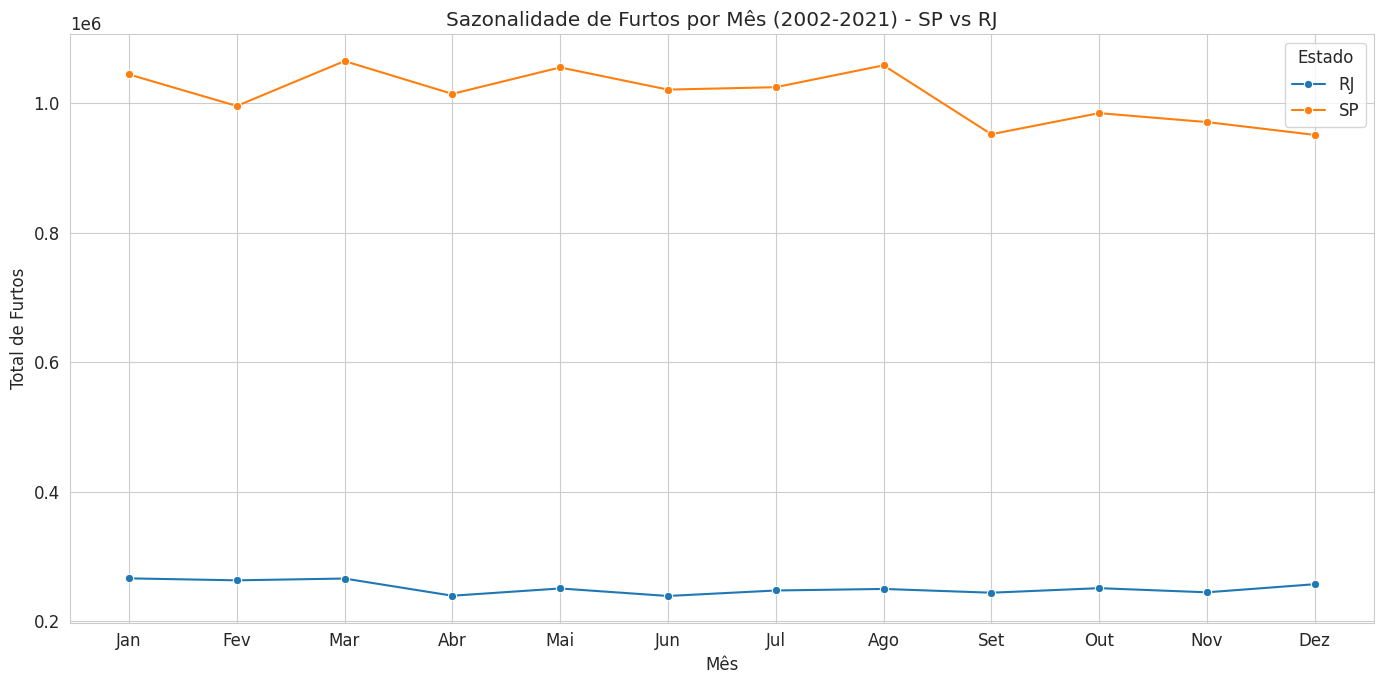

In [ ]:
# 4. Visualizar a sazonalidade de  furtos
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_sazonalidade, x='mes', y='total_furtos', hue='estado', marker='o')
plt.title('Sazonalidade de Furtos por Mês (2002-2021) - SP vs RJ')
plt.xlabel('Mês')
plt.ylabel('Total de Furtos')
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.grid(True)
plt.legend(title='Estado')
plt.tight_layout()
plt.savefig('sazonalidade_furtos_sp_rj.png') # Salvar o gráfico
plt.show()

A análise da sazonalidade dos crimes contra o patrimônio, englobando roubos e furtos, no período de 2002 a 2021, revela padrões mensais distintos e uma acentuada diferença de volume entre São Paulo e Rio de Janeiro. Para os roubos, ambos os estados exibem uma tendência similar: picos de ocorrências são observados no início do ano (março/abril) e, mais proeminentemente, no final do ano (novembro/dezembro), período que coincide com maior atividade comercial e festividades. São Paulo, no entanto, consistentemente registra um número absoluto de roubos significativamente maior que o Rio de Janeiro. Em relação aos furtos, o padrão sazonal apresenta variações mais marcadas. São Paulo demonstra picos evidentes em janeiro e dezembro, sugerindo um aumento das ocorrências em períodos de férias e festas de fim de ano, e uma queda em fevereiro/março. Já o Rio de Janeiro exibe um volume de furtos consideravelmente menor e um padrão sazonal mais linear ao longo do ano, com picos menos pronunciados. As diferenças nos volumes totais de crimes patrimoniais destacam a magnitude diferenciada dos desafios de segurança entre os dois estados, enquanto as similaridades e particularidades sazonais podem indicar influências de fatores comportamentais da população e oportunidades criminais típicas de certas épocas do ano, que podem ser consideradas no planejamento de estratégias de segurança pública.